Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.  

**Задание 1**  
Ответить на вопрос - есть ли связь между жёсткостью воды и средней годовой смертностью?  
a. Построить точечный график  
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена  
c. Построить модель линейной регрессии  
d. Рассчитать коэффициент детерминации  
e. Вывести график остатков  

In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [6]:
water = pd.read_csv('water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


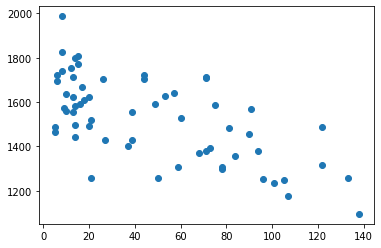

In [7]:
plt.scatter(water['hardness'], water['mortality'])

In [8]:
print("Pearson:\n", water[['hardness', 'mortality']].corr())
print("\nSpearman:\n", water[['hardness', 'mortality']].corr(method='spearman'))

Pearson:
            hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000

Spearman:
            hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000


In [9]:
X = water[['hardness']].values
Y = water[['mortality']].values
model = LinearRegression()
model.fit(X, Y)
print(f"Линейная ф-ия: {model.coef_[0][0]:.2f} * x + {model.intercept_[0]:.0f}")
print(f"Коэффициент детерминации: {model.score(X, Y):.2f}")

Линейная ф-ия: -3.23 * x + 1676
Коэффициент детерминации: 0.43


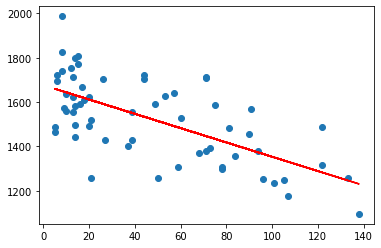

In [10]:
plt.scatter(water['hardness'], water['mortality'])
plt.plot(water['hardness'], model.predict(water[['hardness']]), color='red')

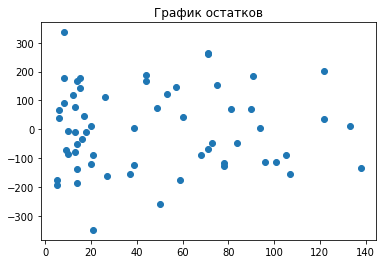

In [20]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

plt.title("График остатков")
plt.scatter(X[:, 1], results.resid)

**Задание 2**  
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?  
a. Разделить данные на 2 группы  
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности  

In [39]:
water_north = water[water['location'] == 'North']
water_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [32]:
print("Pearson:\n", water_north[['hardness', 'mortality']].corr())
print("\nSpearman:\n", water_north[['hardness', 'mortality']].corr(method='spearman'))

Pearson:
            hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000

Spearman:
            hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


In [34]:
XN = water_north[['hardness']].values
YN = water_north[['mortality']].values
model = LinearRegression()
model.fit(XN, YN)
print(f"Линейная ф-ия: {model.coef_[0][0]:.2f} * x + {model.intercept_[0]:.0f}")
print(f"Коэффициент детерминации: {model.score(XN, YN):.2f}")

Линейная ф-ия: -1.93 * x + 1692
Коэффициент детерминации: 0.14


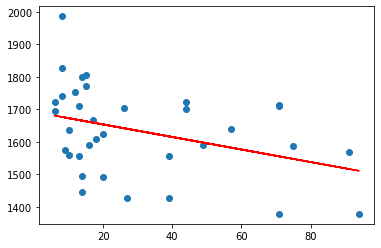

In [36]:
plt.scatter(water_north['hardness'], water_north['mortality'])
plt.plot(water_north['hardness'], model.predict(water_north[['hardness']]), color='red')

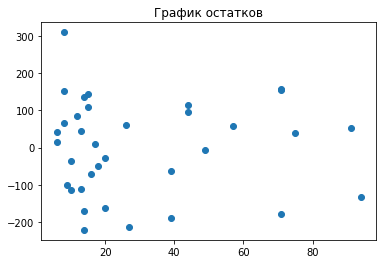

In [38]:
XN2 = sm.add_constant(XN)
model = sm.OLS(YN, XN2)
results = model.fit()

plt.title("График остатков")
plt.scatter(XN2[:, 1], results.resid)

In [41]:
water_south = water[water['location'] == 'South']
water_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [42]:
print("Pearson:\n", water_south[['hardness', 'mortality']].corr())
print("\nSpearman:\n", water_south[['hardness', 'mortality']].corr(method='spearman'))

Pearson:
            hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000

Spearman:
            hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [43]:
XS = water_south[['hardness']].values
YS = water_south[['mortality']].values
model = LinearRegression()
model.fit(XS, YS)
print(f"Линейная ф-ия: {model.coef_[0][0]:.2f} * x + {model.intercept_[0]:.0f}")
print(f"Коэффициент детерминации: {model.score(XS, YS):.2f}")

Линейная ф-ия: -2.09 * x + 1523
Коэффициент детерминации: 0.36


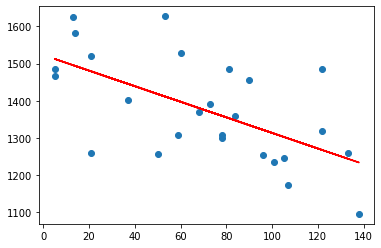

In [44]:
plt.scatter(water_south['hardness'], water_south['mortality'])
plt.plot(water_south['hardness'], model.predict(water_south[['hardness']]), color='red')

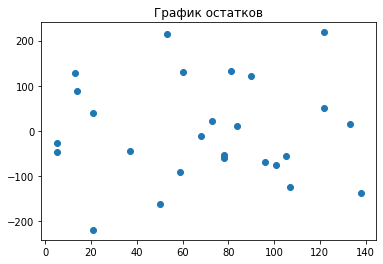

In [45]:
XS2 = sm.add_constant(XS)
model = sm.OLS(YS, XS2)
results = model.fit()

plt.title("График остатков")
plt.scatter(XS2[:, 1], results.resid)

**Выводы**  
Некоторая корреляция между этими показателями есть и относительно хорошо, на мой взгляд, описывается линейной функцией при применении линейной регрессии.

Для южных городов цифры и графики похожи, а вот для северных корреляция заметно меньше (0.65 -> 0.4), графики менее однозначны, коэффицент детерминации линейной регрессии снижается до 0.15  
Возможно, дело в отсутствии в выборке северных городов с большой жёсткостью воды, которые придают нужный наклон прямой в случае с южными городами. В целом, можно отметить недостаточный размер выборки.